### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [262]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

In [263]:
vehicle_df = pd.read_csv("vehicle.csv" ).dropna()
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [264]:
vehicle_df.shape

(813, 19)

In [265]:
vehicle_df.head(1)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

Categorical variable - Class (Count):
car    413
bus    205
van    195
Name: class, dtype: int64


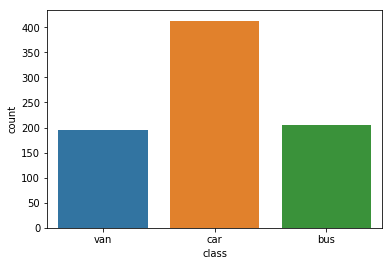

In [266]:
print("\033[94m\033[1mCategorical variable - Class (Count):\x1b[0m")
print( vehicle_df["class"].value_counts())
sns.countplot(x='class', data = vehicle_df)

### Check for any missing values in the data 

In [267]:
print(vehicle_df.isnull().sum())
print("\033[94m\033[1mTotal number of missing values=\x1b[0m", vehicle_df.isnull().sum().sum())

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64
Total number of missing values= 0


### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [268]:
vehicle_features_df = vehicle_df.drop(labels= "class" , axis = 1)
vehicle_features_df.head(1)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197


In [269]:
from scipy.stats import zscore
vehicle_features_df_z = vehicle_features_df.apply(zscore)

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [270]:
distortion = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [271]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial import distance

cluster_range = range( 1, 10)
distortion = []
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(vehicle_features_df_z)
  labels = clusters.labels_                     
  centroids = clusters.cluster_centers_         
  cluster_errors.append( clusters.inertia_ )
  distortion.append(sum(np.min(distance.cdist(vehicle_features_df_z, clusters.cluster_centers_, 'euclidean'), axis=1)) / vehicle_features_df_z.shape[0])

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster (Sum of squares)errors": cluster_errors, "Distortions": distortion  })
clusters_df

,Distortions,cluster (Sum of squares)errors,num_clusters
0,3.939299,14634.000000,1
1,2.966824,8623.136976,2
2,2.643166,7038.408262,3
3,2.529816,6421.858221,4
4,2.433184,5193.019499,5
5,2.314951,4707.273287,6
6,2.243197,4356.901587,7
7,2.178357,4117.552840,8
8,2.111168,3912.212049,9


Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

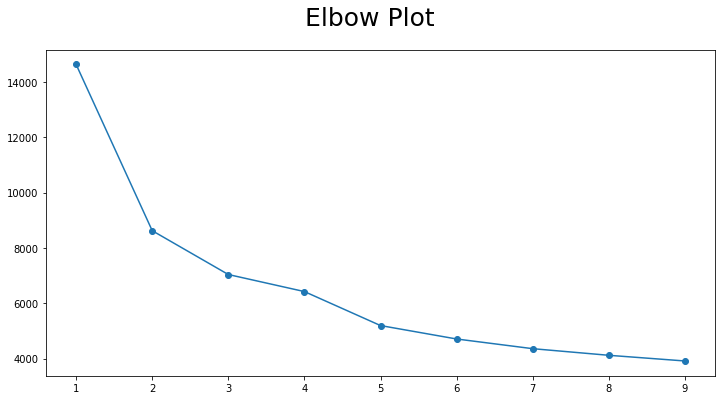

In [272]:
plt.figure(figsize=(12,6))
plt.suptitle('Elbow Plot', fontsize=25)
plt.plot( clusters_df.num_clusters, clusters_df["cluster (Sum of squares)errors"], marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

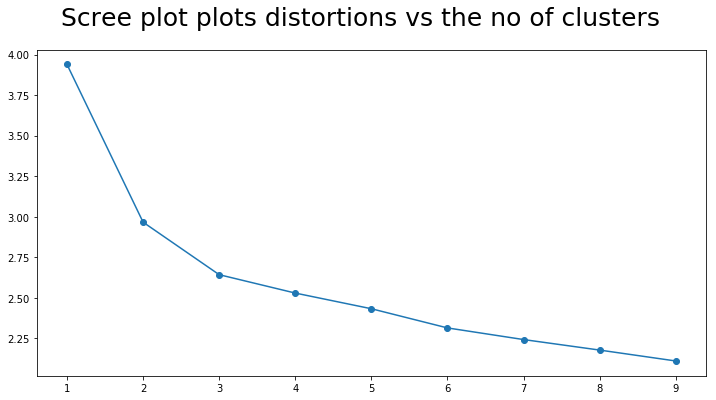

In [273]:
plt.figure(figsize=(12,6))
plt.suptitle('Scree plot plots distortions vs the no of clusters', fontsize=25)
plt.plot( clusters_df.num_clusters, clusters_df["Distortions"], marker = "o" )

### Find out the optimal value of K

In [274]:
print("\033[94m\033[1mOptimal value of K = :\x1b[0m", 3)

Optimal value of K = : 3


### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [275]:
cluster = KMeans( n_clusters = 3, random_state = 1 )
cluster.fit(vehicle_features_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [276]:
centroids = cluster.cluster_centers_  
centroids

array([[-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299]])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [277]:
centroid_df = pd.DataFrame(centroids, columns = list(vehicle_features_df_z) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [278]:
prediction=cluster.predict(vehicle_features_df_z)
vehicle_features_df_z["GROUP"] = prediction

In [279]:
vehicle_features_df_z.groupby("GROUP").count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
GROUP,,,,,,,,,,,,,,,,,,
0,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
1,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260
2,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313


In [280]:
lables = cluster.labels_ 
vehicle_features_df_z["lables"] = lables

In [281]:
vehicle_features_df_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,GROUP,lables
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,2,2
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,2,2
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,1,1
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,2,2
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,0,0


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [282]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [283]:
abc = np.concatenate((a, b, c), axis=0)

In [284]:
hc_df= pd.DataFrame(abc)
hc_df.head()

,0,1
0,10.789635,0.169392
1,9.519515,0.966439
2,7.645213,-1.234404
3,6.917340,-2.020698
4,8.341493,2.826250


### 10. Use scatter matrix to print all the 3 distributions

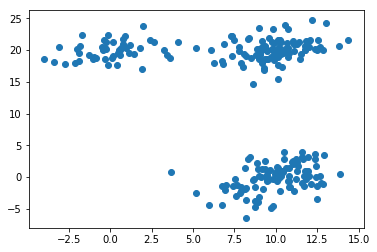

In [285]:
plt.scatter(hc_df.loc[:,0],hc_df.loc[:,1])

### 11. Find out the linkage matrix

In [286]:
hc_df_z = hc_df.apply(zscore)

In [287]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')
model.fit(hc_df_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=6,
            pooling_func=<function mean at 0x00000190E557E1E0>)

Use ward as linkage metric and distance as Eucledian

In [288]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist  
Z = linkage(hc_df_z, 'ward')
c, coph_dists = cophenet(Z , pdist(hc_df_z))
c

0.8712294469572489

In [289]:
Z.shape

Z[1]
Z[1:10]


array([[1.65000000e+02, 1.84000000e+02, 4.57294790e-03, 2.00000000e+00],
       [1.58000000e+02, 1.79000000e+02, 6.05123009e-03, 2.00000000e+00],
       [5.60000000e+01, 7.10000000e+01, 7.66250539e-03, 2.00000000e+00],
       [1.53000000e+02, 1.61000000e+02, 9.27253281e-03, 2.00000000e+00],
       [1.57000000e+02, 1.83000000e+02, 1.07279545e-02, 2.00000000e+00],
       [5.00000000e+00, 5.00000000e+01, 1.08564593e-02, 2.00000000e+00],
       [2.09000000e+02, 2.24000000e+02, 1.09280918e-02, 2.00000000e+00],
       [7.90000000e+01, 8.30000000e+01, 1.21030798e-02, 2.00000000e+00],
       [1.34000000e+02, 1.43000000e+02, 1.32386271e-02, 2.00000000e+00]])

### 12. Plot the dendrogram for the consolidated dataframe

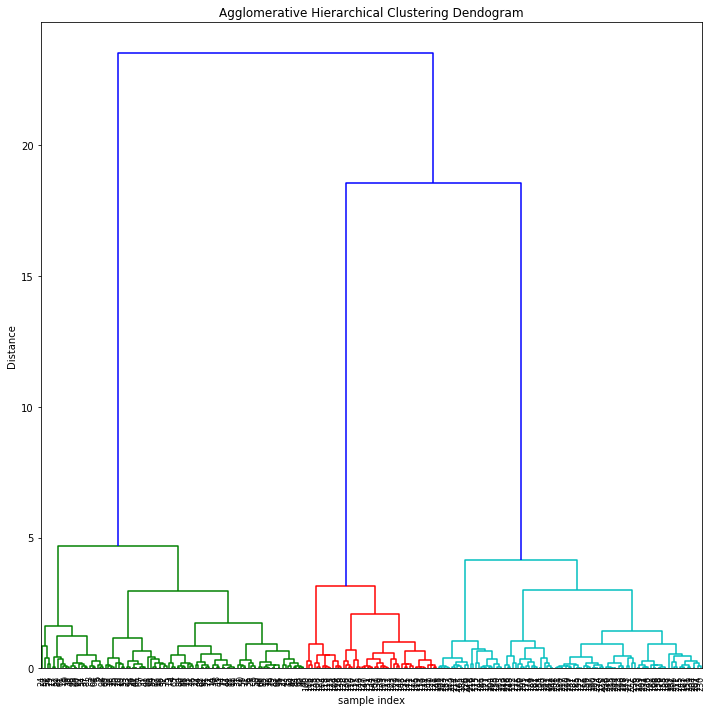

In [290]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 10, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

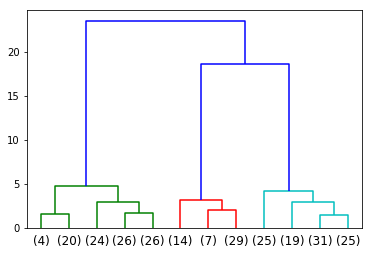

In [291]:
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=12,  
)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

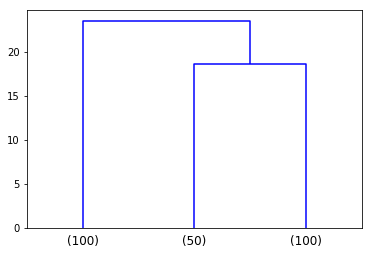

Looking at the dendrogram , the optimal distance between clusters =  10


In [292]:
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=3,  
)
plt.show()
print("\033[94m\033[1mLooking at the dendrogram , the optimal distance between clusters = \x1b[0m", 10)

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [298]:
hc_df["lable"] = fcluster(Z, t = 10, criterion = 'distance')

In [300]:
hc_df.sample(10)

,0,1,lable
199,10.302645,19.369400,3
81,7.815479,-2.580245,1
187,8.634180,14.591456,3
50,10.837569,-1.568297,1
170,10.784577,19.558299,3
207,9.287066,16.895745,3
225,10.730232,18.861191,3
131,0.662960,20.356048,2
85,10.201550,0.771024,1
135,-2.691019,17.787295,2


### Use matplotlib to visually observe the clusters in 2D space 

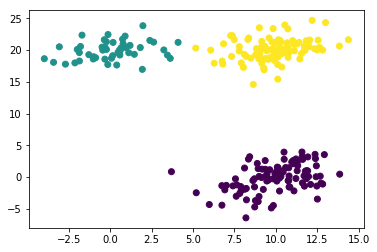

In [295]:
plt.scatter(hc_df[0],hc_df[1] , c = hc_df["lable"])